In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

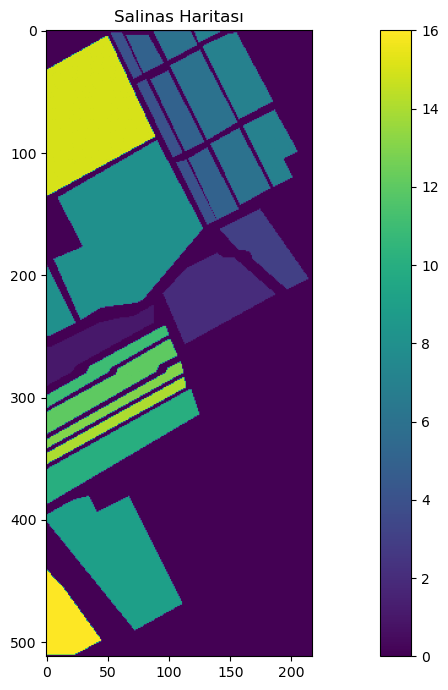

In [3]:
# data = datasets.load_digits()
map = loadmat('salinas_gt.mat')['salinas_gt']

plt.figure(figsize=(14, 7))
plt.imshow(map, cmap='viridis')
plt.title('Salinas Haritası')
plt.colorbar()
 
plt.tight_layout()
plt.show()

In [6]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.stddev = None
        self.components = None
        
    def fit(self, X):

        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)
        X = (X - self.min) / (self.max - self.min)

        

        # Covariance matrix, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors and eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:,i] column vector, transpose this for easier calculations for later
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[indices]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):

        X = (X - np.min(X)) / (np.max(X) - np.min(X))
        X = np.round(X, decimals=5)

        # Project data onto the principal components
        return np.dot(X, self.components.T)

In [16]:
data = loadmat('salinas.mat')['salinas']
X = data.reshape(-1, data.shape[-1])

# Use mean intensity as colors
intensity = np.mean(X, axis=1)
# Project the data onto the 2 primary principal components

x1 = X[:, 0]
x2 = X[:, 1]


pca = PCA(2)

pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (111104, 224)
Shape of transformed X: (111104, 2)


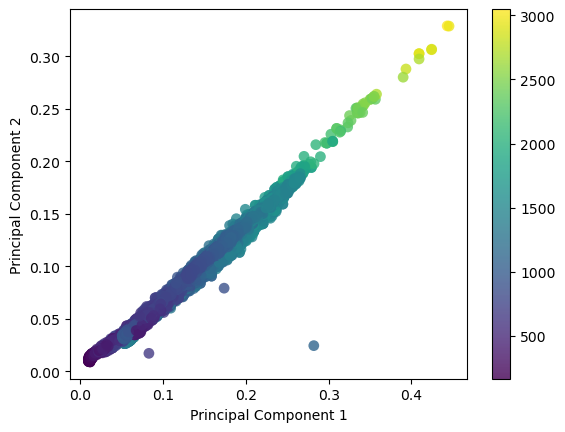

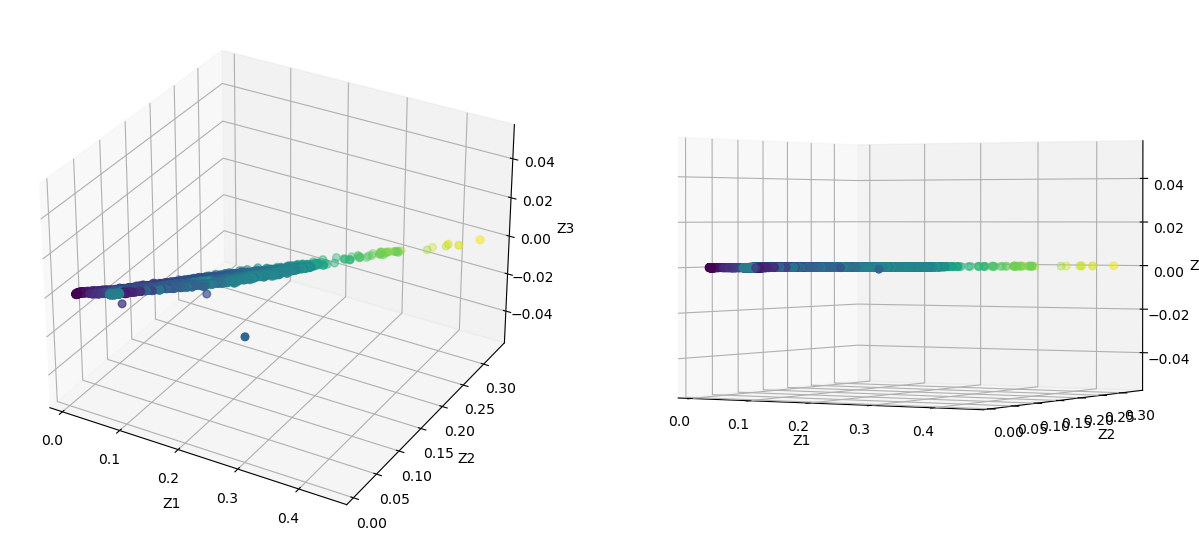

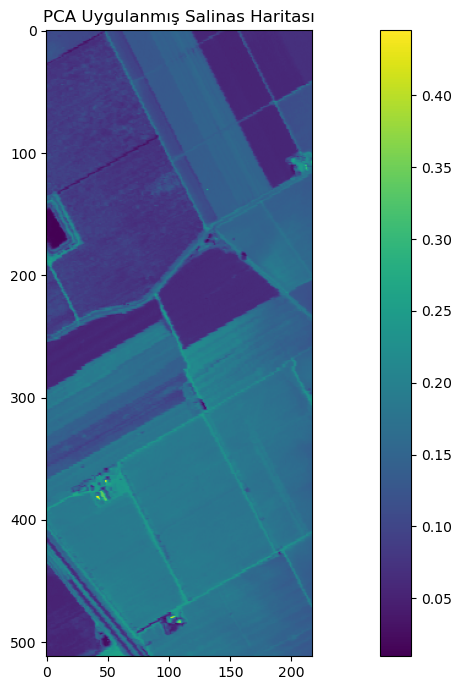

In [17]:
# Plot 2D scatter plot with mean intensity as colors
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
plt.figure()
plt.scatter(
    x1, x2, c=intensity,s=60, edgecolor="none", alpha=0.8, cmap='viridis'
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.set_size_inches(15, 10)
ax1= fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, 0, c=intensity, s=30)
ax1.set_xlabel('Z1')
ax1.set_ylabel('Z2')
ax1.set_zlabel('Z3')
ax2= fig.add_subplot(122, projection='3d')
ax2.scatter(x1, x2, 0, c=intensity, s=30)
ax2.view_init(elev=1)
ax2.set_xlabel('Z1')
ax2.set_ylabel('Z2')
ax2.set_zlabel('Z3')

# İndirgenmiş veriyi orijinal şekline geri dönüştürüldü
salinas_map_reduced = np.reshape(X_projected, (data.shape[0], data.shape[1], 2))

# indirgenmiş veri görselleştirildi
plt.figure(figsize=(14, 7))

# İndirgenmiş Salinas haritasını görüntüleme
plt.subplot(1, 1, 1)
plt.imshow(salinas_map_reduced[:, :, 0], cmap='viridis')  # İlk bileşeni görüntüleyin
plt.title('PCA Uygulanmış Salinas Haritası')
plt.colorbar()

plt.tight_layout()
plt.show()